### 311 Road Condition Data in Oakland for 2019 (Take 2) 

This notebook will attempt to accomplish the following:
-  Combine the geodataframe of 311 road service requests we created in this notebook with a geodataframe of census block group polygons in Oakland from the 2010 census. 
- Produce a map that visualizes the frequency of point occurances (that is 311 requests) in each polygon (census blocks). 

I also will want to explore how to best visualize the time to close data. Perhaps grouping them into bins and then mapping them in the same way as points overall. 

These products will then be used to compare to existing race and income maps, as well as a similar notebook my partner created for 2009 data to see how the spatial distrobution of requests and repsonse times have changed over time.


### Data Import

In [2]:
# for data wrangling
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to for advanced plotting
import matplotlib.pyplot as plt

In [3]:
gdf = gpd.read_file('Data/2019_OAK_311_NoBlank.csv')

### Data Exploration and Formatting

In [4]:
gdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/26/19 13:45,6055962.501,2132386.75,CCD1,12Y,3,37.83815973,-122.2513029,None
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,,7/10/19 18:11,6063364.409,2136673.615,CCD1,13Y,15,37.85030836,-122.225949,None
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/22/19 16:40,6055410.001,2116416.751,CCD2,19X,13,37.79428033,-122.2521805,None
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6076796.539,2120845.822,CCD4,22Y,Open,37.80751844,-122.1784517,None
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6071960.1,2128430.85,CCD4,13Z,Open,37.82810651,-122.1956658,None


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        5285 non-null   object  
 1   DATETIMEINIT     5285 non-null   object  
 2   SOURCE           5285 non-null   object  
 3   DESCRIPTION      5285 non-null   object  
 4   REQCATEGORY      5285 non-null   object  
 5   STATUS           5285 non-null   object  
 6   REFERREDTO       5285 non-null   object  
 7   DATETIMECLOSED   5285 non-null   object  
 8   SRX              5285 non-null   object  
 9   SRY              5285 non-null   object  
 10  COUNCILDISTRICT  5285 non-null   object  
 11  BEAT             5285 non-null   object  
 12  Time to Close    5285 non-null   object  
 13  LAT              5285 non-null   object  
 14  LONG             5285 non-null   object  
 15  geometry         0 non-null      geometry
dtypes: geometry(1), object(15)
memory 

In [6]:
gdf['LAT'] = gdf['LAT'].astype('float64')

In [7]:
gdf['LONG'] = gdf['LONG'].astype('float64')

In [8]:
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.LONG, gdf.LAT))

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        5285 non-null   object  
 1   DATETIMEINIT     5285 non-null   object  
 2   SOURCE           5285 non-null   object  
 3   DESCRIPTION      5285 non-null   object  
 4   REQCATEGORY      5285 non-null   object  
 5   STATUS           5285 non-null   object  
 6   REFERREDTO       5285 non-null   object  
 7   DATETIMECLOSED   5285 non-null   object  
 8   SRX              5285 non-null   object  
 9   SRY              5285 non-null   object  
 10  COUNCILDISTRICT  5285 non-null   object  
 11  BEAT             5285 non-null   object  
 12  Time to Close    5285 non-null   object  
 13  LAT              5285 non-null   float64 
 14  LONG             5285 non-null   float64 
 15  geometry         5285 non-null   geometry
dtypes: float64(2), geometry(1), object

In [10]:
gdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/26/19 13:45,6055962.501,2132386.75,CCD1,12Y,3,37.838160,-122.251303,POINT (-122.25130 37.83816)
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,,7/10/19 18:11,6063364.409,2136673.615,CCD1,13Y,15,37.850308,-122.225949,POINT (-122.22595 37.85031)
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/22/19 16:40,6055410.001,2116416.751,CCD2,19X,13,37.794280,-122.252180,POINT (-122.25218 37.79428)
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6076796.539,2120845.822,CCD4,22Y,Open,37.807518,-122.178452,POINT (-122.17845 37.80752)
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6071960.1,2128430.85,CCD4,13Z,Open,37.828107,-122.195666,POINT (-122.19567 37.82811)


<AxesSubplot:>

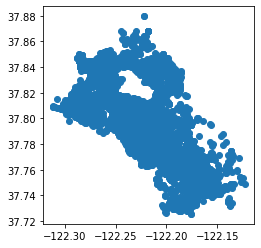

In [11]:
gdf.plot()

### Statistics

In [12]:
gdf_no_open = gdf[gdf['Time to Close']!='Open']

In [13]:
gdf_no_open['Time to Close'] = gdf_no_open['Time to Close'].astype('int64')

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [14]:
gdf_no_open.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3778 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        3778 non-null   object  
 1   DATETIMEINIT     3778 non-null   object  
 2   SOURCE           3778 non-null   object  
 3   DESCRIPTION      3778 non-null   object  
 4   REQCATEGORY      3778 non-null   object  
 5   STATUS           3778 non-null   object  
 6   REFERREDTO       3778 non-null   object  
 7   DATETIMECLOSED   3778 non-null   object  
 8   SRX              3778 non-null   object  
 9   SRY              3778 non-null   object  
 10  COUNCILDISTRICT  3778 non-null   object  
 11  BEAT             3778 non-null   object  
 12  Time to Close    3778 non-null   int64   
 13  LAT              3778 non-null   float64 
 14  LONG             3778 non-null   float64 
 15  geometry         3778 non-null   geometry
dtypes: float64(2), geometry(1), int64(

In [15]:
gdf_no_open['Time to Close'].describe()

count    3778.000000
mean      141.172313
std       225.656483
min         0.000000
25%         7.000000
50%        32.000000
75%       127.000000
max       995.000000
Name: Time to Close, dtype: float64

In [16]:
gdf_no_open['Time to Close'].mean()

141.1723133933298

In [17]:
gdf_no_open['Time to Close'].median()

32.0

<AxesSubplot:ylabel='Frequency'>

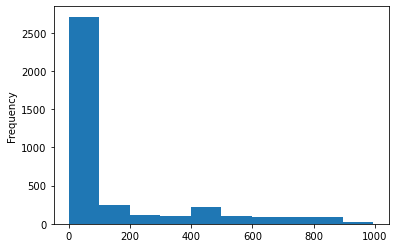

In [18]:
gdf_no_open['Time to Close'].plot.hist(bins=10)

In [19]:
gdf['COUNCILDISTRICT'].value_counts()

CCD4    1043
CCD1     788
CCD2     758
CCD7     708
CCD5     692
CCD3     668
CCD6     466
         162
Name: COUNCILDISTRICT, dtype: int64

In [20]:
gdf['SOURCE'].value_counts()

SeeClickFix       3593
Phone             1017
Email              307
Phone or Email     267
Voicemail           91
Other               10
Name: SOURCE, dtype: int64

In [21]:
gdf['STATUS'].value_counts()

CLOSED             3778
OPEN               1504
GONE ON ARRIVAL       2
REFERRED              1
Name: STATUS, dtype: int64

### Joining Geodataframes

In [22]:
polydf = gpd.read_file('Data/Alameda_Census_Blocks_2010.geojson')

In [23]:
polydf.head()

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry
0,06,G5040,,Block 2024,+37.7514499,2024,0,S,1180,060014100002024,410000,-122.1244488,,001,"MULTIPOLYGON (((-122.12489 37.75164, -122.1247..."
1,06,G5040,,Block 2017,+37.7700438,2017,0,S,553,060014073002017,407300,-122.2099801,,001,"MULTIPOLYGON (((-122.21025 37.77010, -122.2101..."
2,06,G5040,,Block 2011,+37.7945823,2011,0,S,11797,060014081002011,408100,-122.1820803,,001,"MULTIPOLYGON (((-122.18212 37.79493, -122.1818..."
3,06,G5040,,Block 2002,+37.8343484,2002,0,S,598,060014010002002,401000,-122.2699940,,001,"MULTIPOLYGON (((-122.27004 37.83399, -122.2701..."
4,06,G5040,,Block 1005,+37.7783082,1005,0,S,139,060014061001005,406100,-122.2273093,,001,"MULTIPOLYGON (((-122.22720 37.77830, -122.2272..."


<AxesSubplot:>

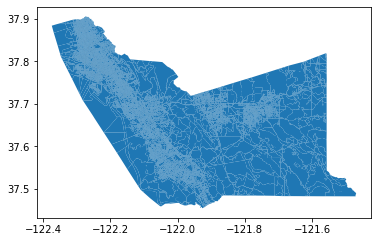

In [24]:
polydf.plot()

In [25]:
joinedgdf = gpd.sjoin(gdf, polydf, how="left")

In [26]:
pd.set_option('display.max_columns', None)
joinedgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/26/19 13:45,6055962.501,2132386.75,CCD1,12Y,3,37.838160,-122.251303,POINT (-122.25130 37.83816),19475.0,06,G5040,,Block 2002,+37.8390277,2002,0,S,1686,060014003002002,400300,-122.2513567,,001
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,,7/10/19 18:11,6063364.409,2136673.615,CCD1,13Y,15,37.850308,-122.225949,POINT (-122.22595 37.85031),6229.0,06,G5040,,Block 1058,+37.8520136,1058,0,S,124422,060014001001058,400100,-122.2261098,,001
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/22/19 16:40,6055410.001,2116416.751,CCD2,19X,13,37.794280,-122.252180,POINT (-122.25218 37.79428),17467.0,06,G5040,,Block 3027,+37.7939228,3027,0,S,938,060014060003027,406000,-122.2518223,,001
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6076796.539,2120845.822,CCD4,22Y,Open,37.807518,-122.178452,POINT (-122.17845 37.80752),249.0,06,G5040,,Block 4010,+37.8138408,4010,0,S,1435012,060014046004010,404600,-122.1852490,,001
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,,,6071960.1,2128430.85,CCD4,13Z,Open,37.828107,-122.195666,POINT (-122.19567 37.82811),21292.0,06,G5040,,Block 2006,+37.8276659,2006,0,S,37305,060014046002006,404600,-122.1945662,,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,923771,7/11/19 17:33,SeeClickFix,Streets/Sidewalks - Other/Complex,STREETSW,OPEN,,,6085411.691,2097300.792,CCD7,32Y,Open,37.743286,-122.147201,POINT (-122.14720 37.74329),5806.0,06,G5040,,Block 2041,+37.7417928,2041,0,S,42685,060014100002041,410000,-122.1457285,,001
5281,921704,7/5/19 14:02,Email,Streets - Potholes/Depression,STREETSW,OPEN,,,6056022.087,2123898.335,CCD2,14Y,Open,37.814855,-122.250547,POINT (-122.25055 37.81486),22789.0,06,G5040,,Block 3005,+37.8146562,3005,0,S,80916,060014039003005,403900,-122.2498626,,001
5282,916830,6/19/19 12:43,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/1/19 06:25,6058128,2118764.25,CCD2,17Y,12,37.800866,-122.242927,POINT (-122.24293 37.80087),3502.0,06,G5040,,Block 3007,+37.8007577,3007,0,S,9154,060014056003007,405600,-122.2422174,,001
5283,916568,6/18/19 19:20,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,6/24/19 14:52,6064486.543,2134004.608,CCD1,13Y,6,37.843036,-122.221893,POINT (-122.22189 37.84304),19699.0,06,G5040,,Block 1024,+37.8428967,1024,0,S,9185,060014044001024,404400,-122.2214296,,001


In [27]:
joinedgdf['geoid10'].value_counts()

060014045022007    29
060014041021000    28
060014047001002    25
060014045024015    24
060014085003003    23
                   ..
060014087001010     1
060014005001005     1
060014102001005     1
060014017003078     1
060014003002006     1
Name: geoid10, Length: 2248, dtype: int64

In [28]:
countdf = joinedgdf['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='counts')
print (countdf)

              geoid10  counts
0     060014045022007      29
1     060014041021000      28
2     060014047001002      25
3     060014045024015      24
4     060014085003003      23
...               ...     ...
2243  060014087001010       1
2244  060014005001005       1
2245  060014102001005       1
2246  060014017003078       1
2247  060014003002006       1

[2248 rows x 2 columns]


In [29]:
blockcountgdf = polydf.merge(countdf,on='geoid10')
blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
0,06,G5040,,Block 2002,+37.8010533,2002,0,S,2140,060014053012002,405301,-122.2543675,,001,"MULTIPOLYGON (((-122.25395 37.80253, -122.2541...",4
1,06,G5040,,Block 3007,+37.7949838,3007,0,S,11456,060014054013007,405401,-122.2521420,,001,"MULTIPOLYGON (((-122.25211 37.79567, -122.2519...",1
2,06,G5040,,Block 1008,+37.7976210,1008,0,S,11611,060014054011008,405401,-122.2484415,,001,"MULTIPOLYGON (((-122.24930 37.79766, -122.2488...",3
3,06,G5040,,Block 1016,+37.7631293,1016,0,S,13457,060014098001016,409800,-122.1612728,,001,"MULTIPOLYGON (((-122.16011 37.76330, -122.1601...",5
4,06,G5040,,Block 1006,+37.8007584,1006,0,S,8075,060019820001006,982000,-122.2829223,,001,"MULTIPOLYGON (((-122.28333 37.80116, -122.2833...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,06,G5040,,Block 1014,+37.8474571,1014,0,S,21893,060014004001014,400400,-122.2553884,,001,"MULTIPOLYGON (((-122.25434 37.84809, -122.2542...",1
2244,06,G5040,,Block 1024,+37.8611524,1024,0,S,249433,060014001001024,400100,-122.2376959,,001,"MULTIPOLYGON (((-122.24402 37.86074, -122.2439...",10
2245,06,G5040,,Block 1009,+37.7862553,1009,0,S,12770,060014063001009,406300,-122.2227530,,001,"MULTIPOLYGON (((-122.22333 37.78688, -122.2231...",1
2246,06,G5040,,Block 2013,+37.7844475,2013,0,S,453,060014070002013,407000,-122.2004468,,001,"MULTIPOLYGON (((-122.20072 37.78427, -122.2007...",2


In [30]:
blockcountgdf.sort_values(by='counts',ascending = True)

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
1123,06,G5040,,Block 3001,+37.7618290,3001,0,S,13289,060014099003001,409900,-122.1235385,,001,"MULTIPOLYGON (((-122.11846 37.75426, -122.1184...",1
1267,06,G5040,,Block 1050,+37.8089341,1050,0,S,14676,060014105001050,410500,-122.2870158,,001,"MULTIPOLYGON (((-122.28625 37.80949, -122.2863...",1
1266,06,G5040,,Block 1017,+37.8185438,1017,0,S,14688,060014016001017,401600,-122.2857643,,001,"MULTIPOLYGON (((-122.28560 37.81767, -122.2858...",1
1265,06,G5040,,Block 4000,+37.7765118,4000,0,S,46712,060014076004000,407600,-122.2055690,,001,"MULTIPOLYGON (((-122.20401 37.77761, -122.2044...",1
1264,06,G5040,,Block 1004,+37.7821594,1004,0,S,23043,060014076001004,407600,-122.2018917,,001,"MULTIPOLYGON (((-122.20047 37.78144, -122.2006...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,06,G5040,,Block 1015,+37.8472540,1015,25272,S,296701,060014043001015,404300,-122.2292738,,001,"MULTIPOLYGON (((-122.23421 37.84691, -122.2342...",23
1830,06,G5040,,Block 4015,+37.8273103,4015,0,S,102849,060014045024015,404502,-122.2085940,,001,"MULTIPOLYGON (((-122.20626 37.82440, -122.2066...",24
1589,06,G5040,,Block 1002,+37.8136998,1002,0,S,395184,060014047001002,404700,-122.2116078,,001,"MULTIPOLYGON (((-122.21407 37.81247, -122.2144...",25
1562,06,G5040,,Block 1000,+37.8260833,1000,0,S,55836,060014041021000,404102,-122.2484905,,001,"MULTIPOLYGON (((-122.24935 37.82870, -122.2491...",28


<AxesSubplot:>

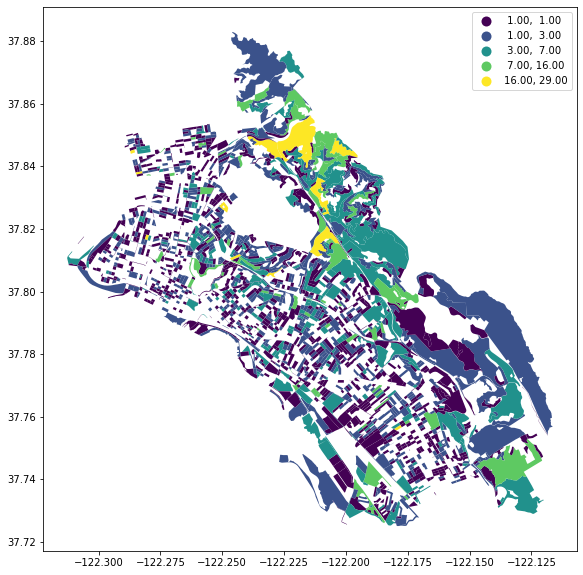

In [52]:
blockcountgdf.plot(figsize=(10,10),
                 column='counts',
                 legend=True, 
                 scheme='NaturalBreaks')

In [53]:
blockcountgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
gdf_web_mercator = blockcountgdf.to_crs(epsg=3857)

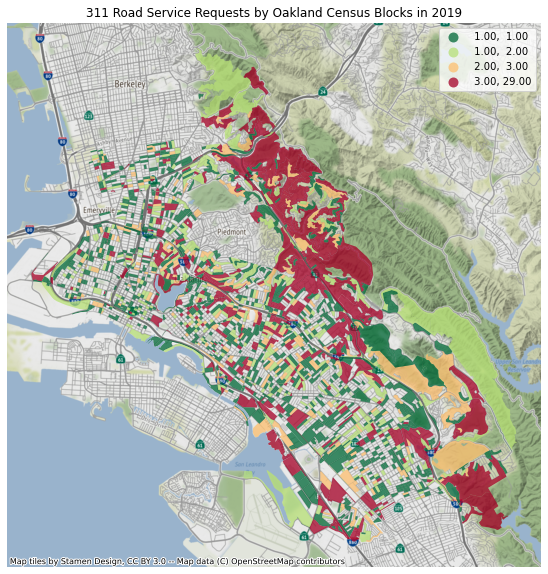

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

# regular count map on the left
gdf_web_mercator.plot(column='counts', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("311 Road Service Requests by Oakland Census Blocks in 2019")
ctx.add_basemap(ax)

In [56]:
blockcountgdf['counts'].describe()

count    2248.000000
mean        2.348310
std         2.516194
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        29.000000
Name: counts, dtype: float64

<AxesSubplot:ylabel='Frequency'>

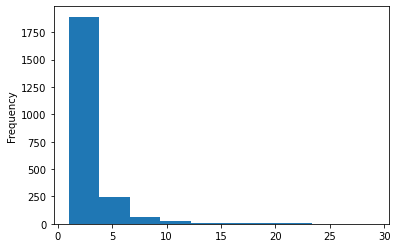

In [57]:
blockcountgdf['counts'].plot.hist(bins=10)

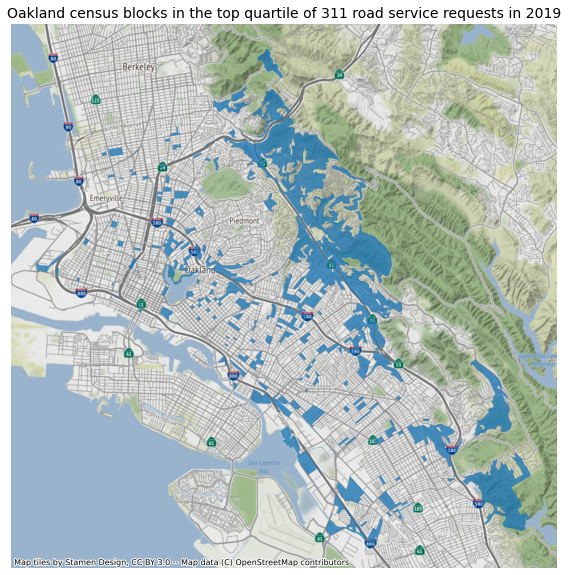

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator[gdf_web_mercator['counts'] > 3].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

Think a really cool idea would be to add racial data to this data frame. So that eahc of these blocks were colored by race or income level. 

Potential pitfalls here: 
- Who is using 311? We might need to do some sort of cross analysis to verify. 
- Larger blocks might just have more roads, which means more potholes. I have no idea if there is any way to normalize the data. 

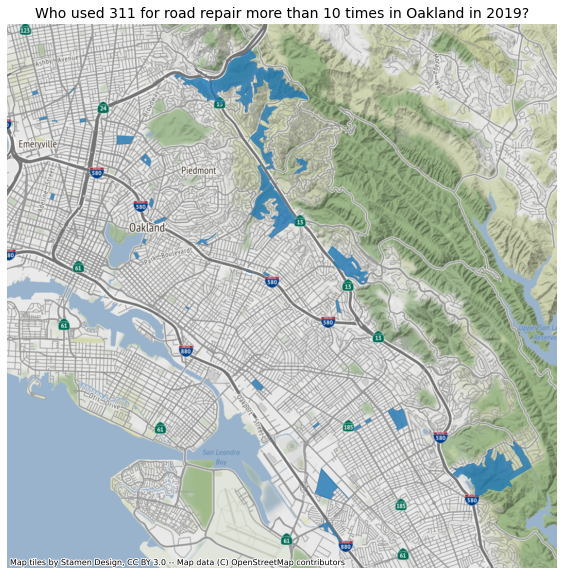

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator[gdf_web_mercator['counts'] > 10].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Who used 311 for road repair more than 10 times in Oakland in 2019?',fontsize=14)

# add a basemap
ctx.add_basemap(ax)